#  A PROJECT ON FRAUD DETECTION AND ANALYSIS ON TREND OF FRAUD

## IMPORTING REQUIRED LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import gridspec

## LOADING DATASET

In [2]:
df=pd.read_csv("default of credit card clients.csv")

In [3]:
df

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### FEATURES
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

### SHAPE OF DATA

In [4]:
print(df.shape)

(30001, 25)


### CHECKING FOR NULL VALUES

In [5]:
df.isnull().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64

In [6]:
df = df.sample(frac=0.1, random_state = 48)
print(df.shape)
print(df.describe())

(3000, 25)
       Unnamed: 0     X1    X2    X3    X4    X5    X6    X7    X8    X9  ...  \
count        3000   3000  3000  3000  3000  3000  3000  3000  3000  3000  ...   
unique       3000     65     2     7     4    49     9     9    10     9  ...   
top          2858  50000     2     2     2    29     0     0     0     0  ...   
freq            1    312  1799  1439  1575   160  1488  1583  1577  1633  ...   

         X15   X16   X17   X18   X19   X20   X21   X22   X23     Y  
count   3000  3000  3000  3000  3000  3000  3000  3000  3000  3000  
unique  2514  2503  2445  1423  1372  1318  1237  1197  1204     2  
top        0     0     0     0     0     0     0     0     0     0  
freq     339   350   403   506   561   618   644   677   741  2329  

[4 rows x 25 columns]


In [7]:
df.dropna

<bound method DataFrame.dropna of       Unnamed: 0      X1 X2 X3 X4  X5  X6  X7  X8  X9  ...     X15     X16  \
934          934   30000  1  2  2  32   2   0   0   2  ...   11112   12923   
810          810  160000  2  2  0  37   0   0   0   0  ...   28574   27268   
3414        3414  150000  1  1  2  33   1   2   2   2  ...   88399   89629   
6146        6146  100000  2  3  1  46   0   0   2   2  ...   98047  101891   
29479      29479   50000  1  3  1  42   0   0   2   2  ...   22876   23328   
...          ...     ... .. .. ..  ..  ..  ..  ..  ..  ...     ...     ...   
7641        7641  230000  1  1  2  32  -2  -2  -2  -2  ...    3126     500   
26322      26322  160000  2  2  1  44  -1  -1  -2  -2  ...       0       0   
29706      29706  150000  1  3  1  43  -1   2  -1  -1  ...     780    1746   
27509      27509  180000  1  2  1  57   0   0   0   0  ...  127051  128562   
4998        4998  200000  2  2  1  45   0   0   0   0  ...  121888   66771   

          X17    X18   X19   

In [8]:
print(df.groupby('Y').size()) 

Y
0    2329
1     671
dtype: int64


In [9]:
df=df.astype(float)

## DATA VISUALIZATION

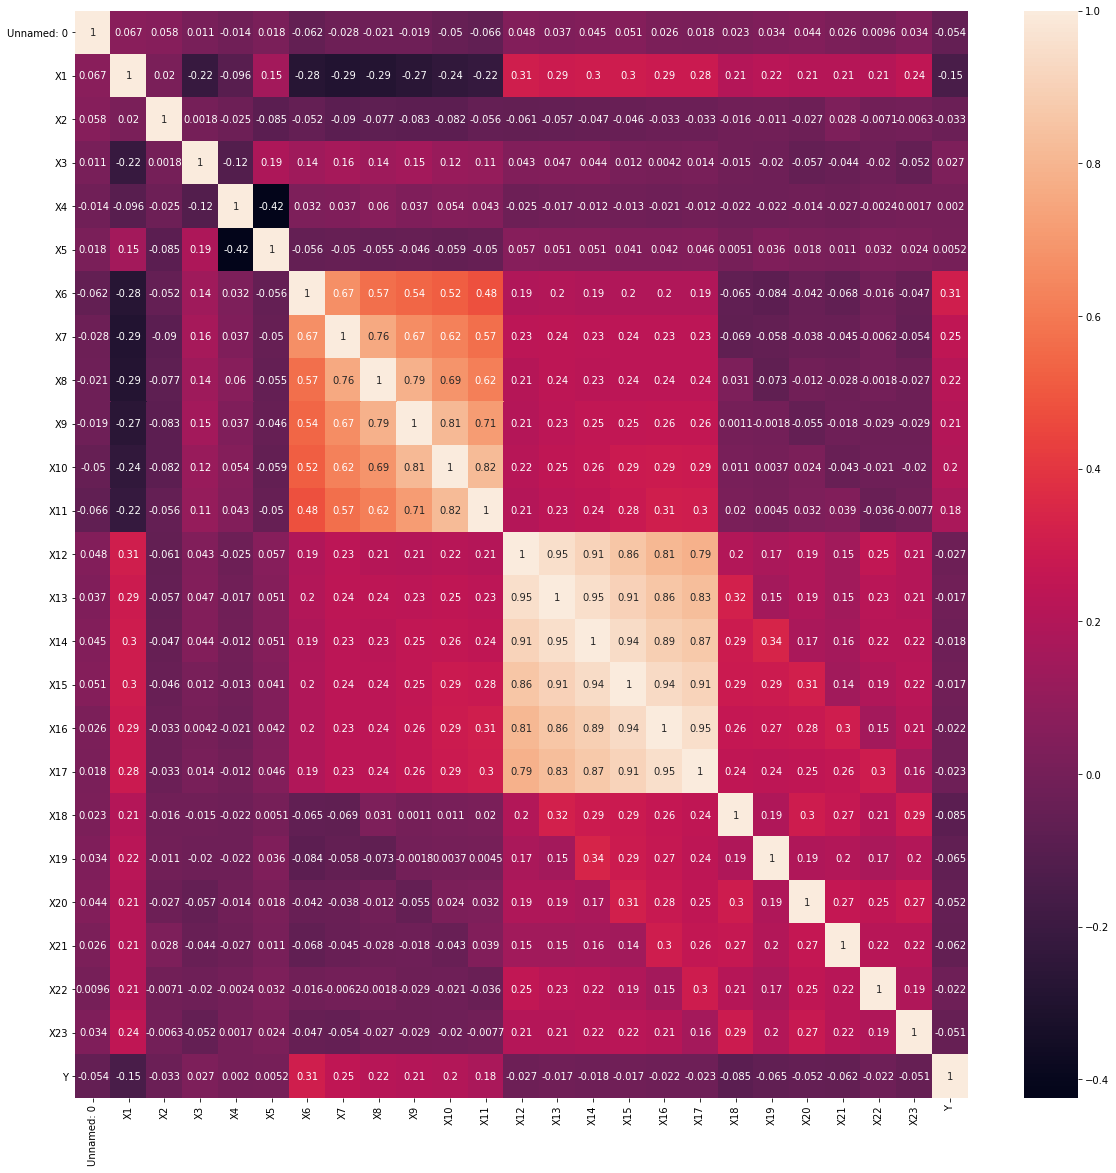

In [10]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)


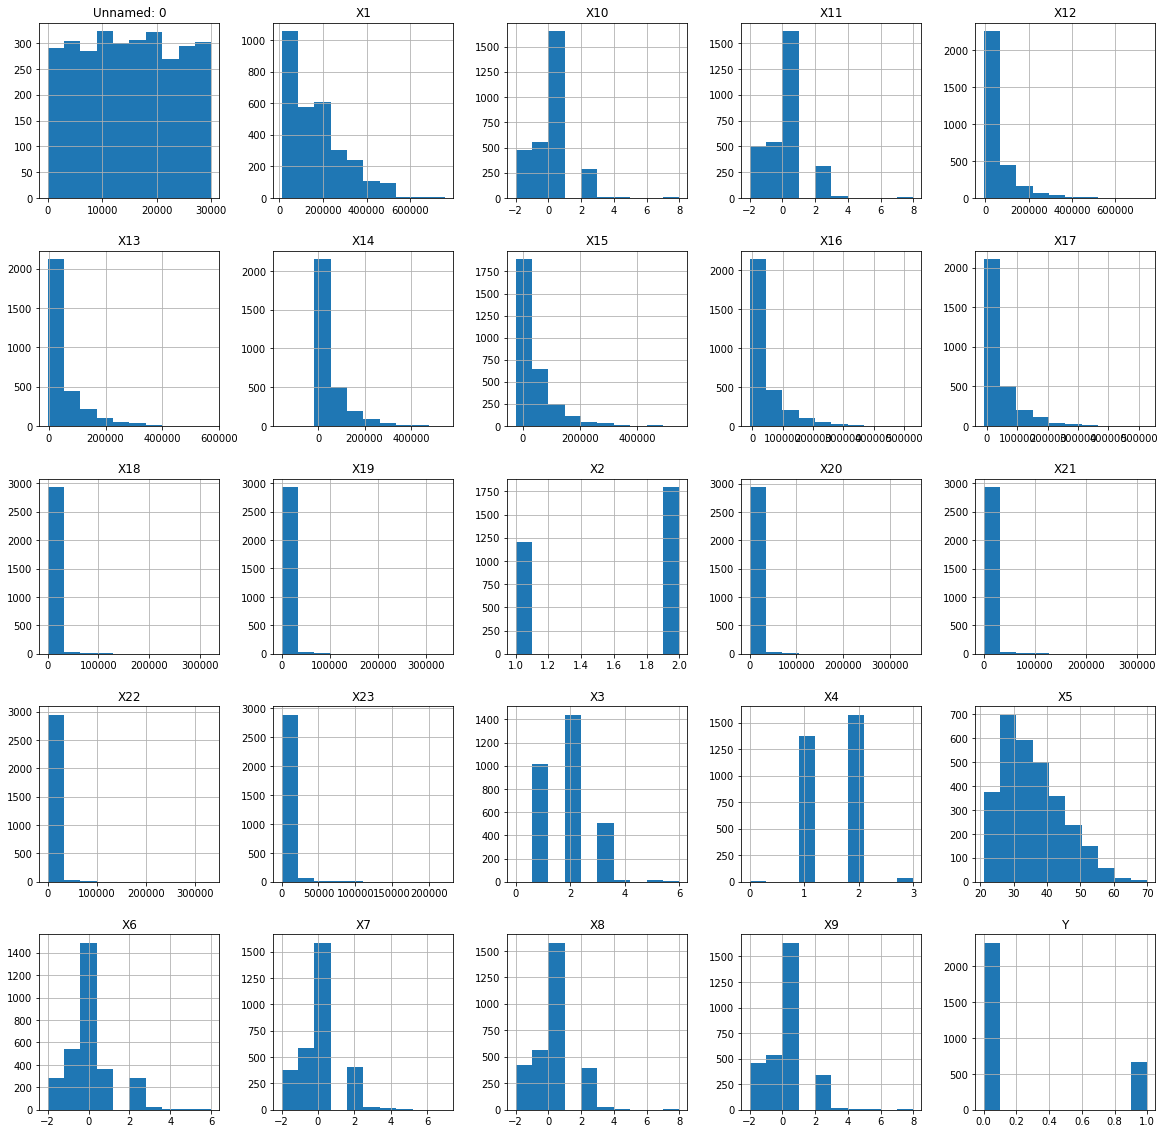

In [11]:
df.hist(figsize=(20,20))
plt.show()

## TRAINING DATA

In [12]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [13]:
X=df.drop(["Y"],axis=1)
Y=df["Y"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

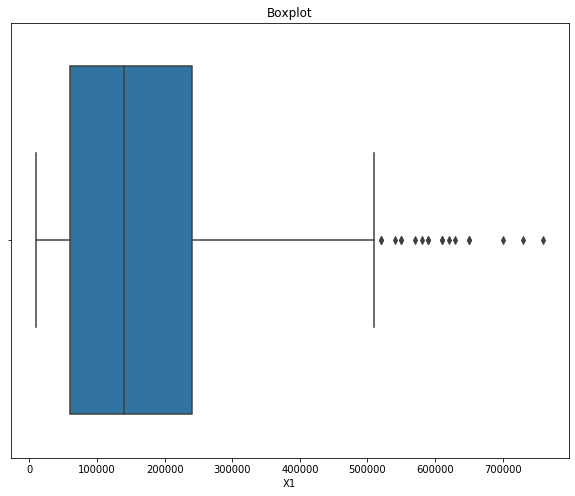

In [14]:
plt.figure(figsize=(10,8))
bx =sns.boxplot(x= "X1",data = X )
bx.set_title("Boxplot")
plt.show()

Figure(432x288)
AxesSubplot(0.125,0.125;0.775x0.755)


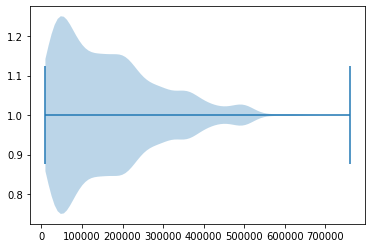

In [15]:
fig,ax=plt.subplots()
print(fig)
print(ax)
ax.violinplot(X["X1"],vert=False)
plt.show()

## LOGISTIC REGRESSION

In [16]:
logit=linear_model.LogisticRegression(C=1e10,max_iter=1e5)
logit.fit(X_train,Y_train)

LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100000.0, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [17]:
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 

n_outliers = len(Y) 
predictions = logit.predict(X_test)
n_errors = (predictions != Y_test).sum() 
print("The model used is Logistic Regression") 

print('Logistic Regression Accuracy Score on Test data:', logit.score(X_test,Y_test))
print('Logistic Regression Accuracy Score on train data:', logit.score(X_train,Y_train))

from sklearn.metrics import confusion_matrix
predictions = logit.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(Y_test,predictions))

prec = precision_score(Y_test, predictions) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(Y_test, predictions) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(Y_test, predictions) 
print("The F1-Score is {}".format(f1)) 

The model used is Logistic Regression
Logistic Regression Accuracy Score on Test data: 0.7583333333333333
Logistic Regression Accuracy Score on train data: 0.78125
Confusion Matrix
[[454   1]
 [144   1]]
The precision is 0.5
The recall is 0.006896551724137931
The F1-Score is 0.013605442176870748


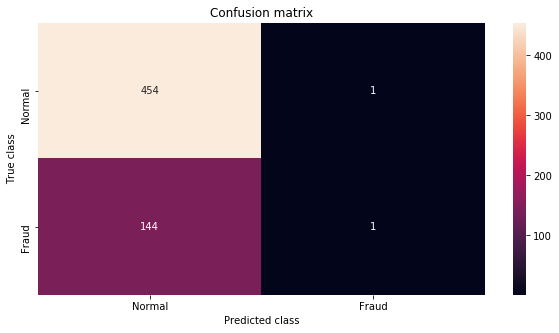

In [18]:
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(Y_test, predictions) 
plt.figure(figsize =(10,5)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()

## DECISION TREE

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

C:\Users\HP\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [21]:
X=df.drop(["Y"],axis=1).values
Y=df["Y"].values
clf = DecisionTreeClassifier()
clf.fit(X_test,Y_test)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

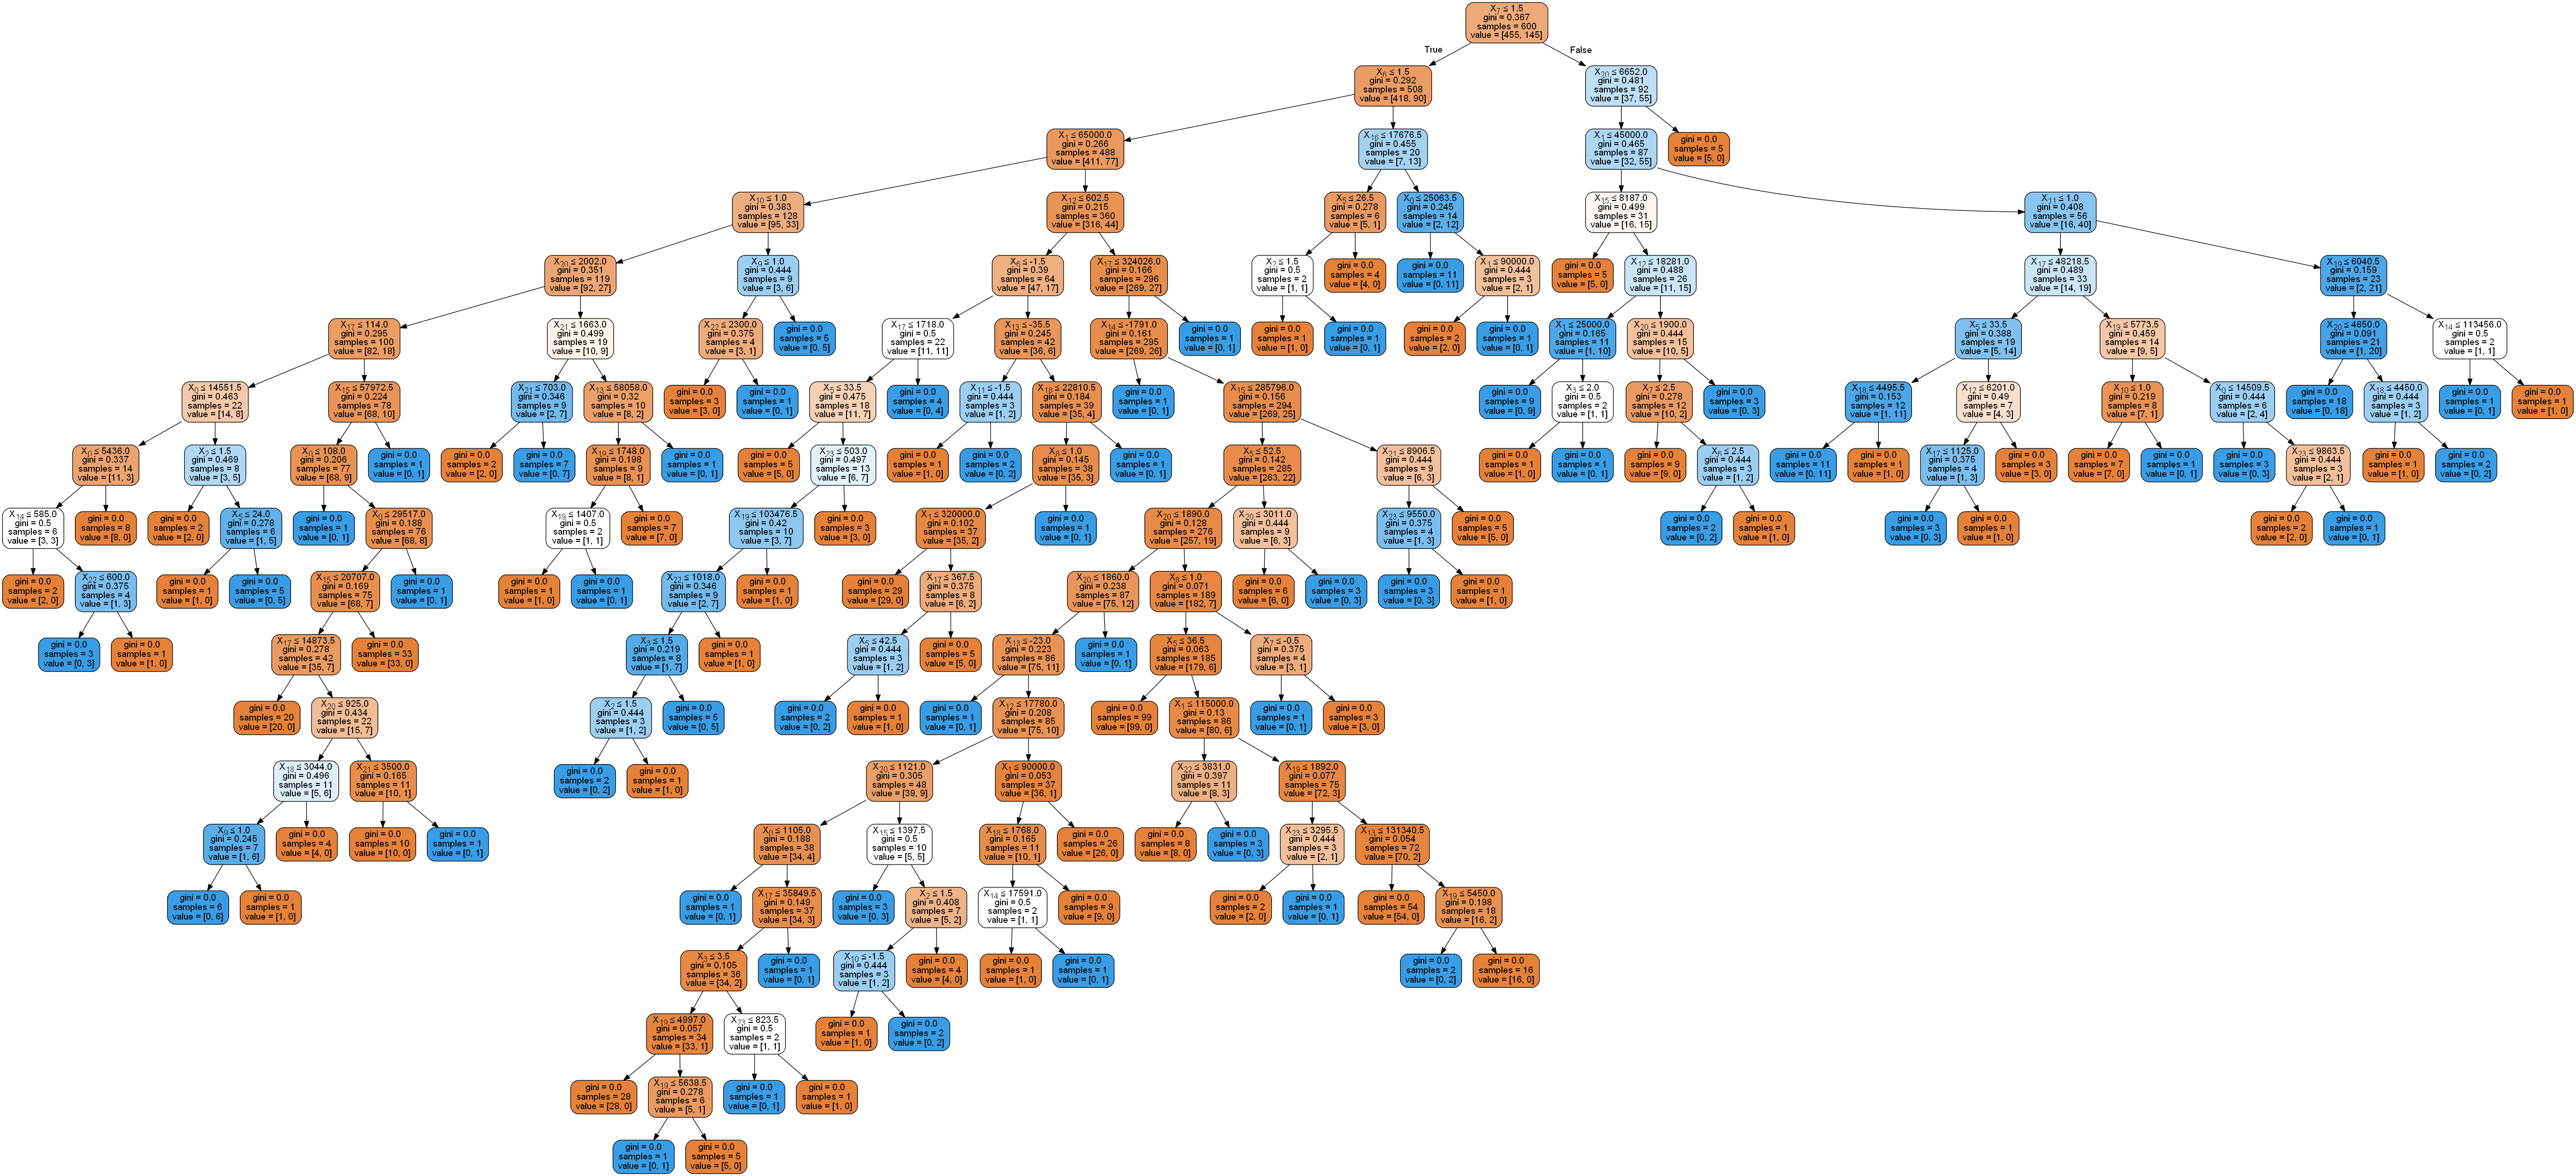

In [22]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())


In [23]:
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,Y_train)

n_outliers = len(Y) 
predictions = dt_clf.predict(X_test)
n_errors = (predictions != Y_test).sum() 
print("The model used is Decision Tree")

print('Decision Tree Accuracy Score:', dt_clf.score(X_test,Y_test))

from sklearn.metrics import confusion_matrix
predictions = dt_clf.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(Y_test,predictions))

prec = precision_score(Y_test, predictions) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(Y_test, predictions) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(Y_test, predictions) 
print("The F1-Score is {}".format(f1)) 

The model used is Decision Tree
Decision Tree Accuracy Score: 0.7316666666666667
Confusion Matrix
[[369  86]
 [ 75  70]]
The precision is 0.44871794871794873
The recall is 0.4827586206896552
The F1-Score is 0.46511627906976744


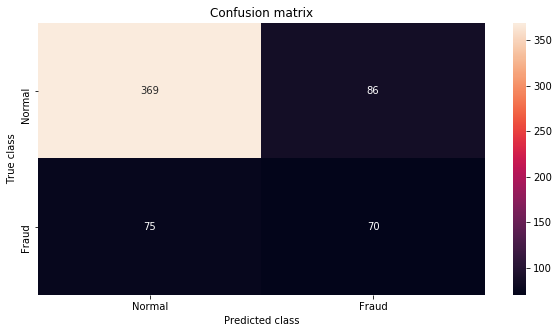

In [24]:
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(Y_test, predictions) 
plt.figure(figsize =(10,5)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()

## RANDOM FOREST 

In [25]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25)
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(class_weight='balanced')
rf_clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 

n_outliers = len(Y) 
predictions = rf_clf.predict(X_test)
n_errors = (predictions != Y_test).sum() 
print("The model used is Random Forest classifier") 

print('Random Forest Classifier Accuracy Score:', rf_clf.score(X_test,Y_test))

from sklearn.metrics import confusion_matrix
predictions = rf_clf.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(Y_test,predictions))

prec = precision_score(Y_test, predictions) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(Y_test, predictions) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(Y_test, predictions) 
print("The F1-Score is {}".format(f1)) 

The model used is Random Forest classifier
Random Forest Classifier Accuracy Score: 0.7883333333333333
Confusion Matrix
[[430  25]
 [102  43]]
The precision is 0.6323529411764706
The recall is 0.296551724137931
The F1-Score is 0.40375586854460094


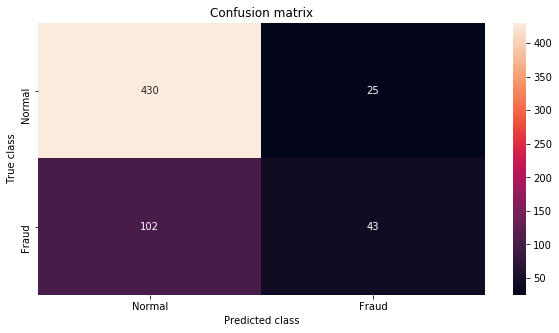

In [27]:
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(Y_test, predictions) 
plt.figure(figsize =(10,5)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()

## K-NEAREST NEIGHBORS

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf= KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree', weights='distance')
knn_clf.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [29]:
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 

n_outliers = len(Y) 
predictions = knn_clf.predict(X_test)
n_errors = (predictions != Y_test).sum() 
print("The model used is K-Nearest Neighbors") 

print('Accuracy Score:', knn_clf.score(X_test,Y_test))

from sklearn.metrics import confusion_matrix
predictions = knn_clf.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(Y_test,predictions))

prec = precision_score(Y_test, predictions) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(Y_test, predictions) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(Y_test, predictions) 
print("The F1-Score is {}".format(f1)) 

The model used is K-Nearest Neighbors
Accuracy Score: 0.735
Confusion Matrix
[[412  43]
 [116  29]]
The precision is 0.4027777777777778
The recall is 0.2
The F1-Score is 0.2672811059907834


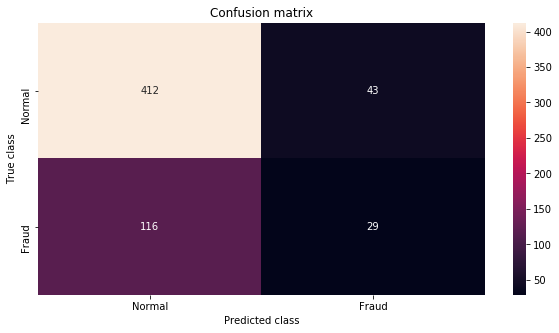

In [30]:
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(Y_test, predictions) 
plt.figure(figsize =(10,5)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()

In [31]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
rmse_val =[]
for K in range(20):
        K =K+1
        model= neighbors.KNeighborsRegressor(n_neighbors = K)
        model.fit(X_train, Y_train)
        pred = model.predict(X_test)
        error=sqrt(mean_squared_error(Y_test,pred))
        rmse_val.append(error)
        print(K, error)

1 0.5830951894845301
2 0.4907477288111819
3 0.47628967220784024
4 0.46300647943630335
5 0.4574567374808974
6 0.4540456005814916
7 0.4492245775649807
8 0.44152906661585334
9 0.43368931247274983
10 0.43358966777357605
11 0.4336246107294915
12 0.432089561189447
13 0.43081501588184024
14 0.43046209943224856
15 0.428330090778907
16 0.4276875806785447
17 0.4281205405395003
18 0.4281443835538711
19 0.4285193214596816
20 0.42778499272414877


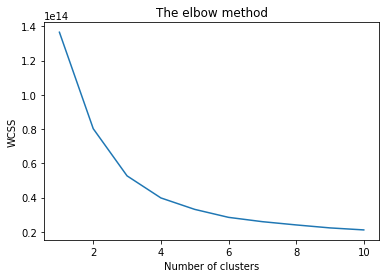

In [33]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [34]:
X = np.array(X)
X

array([[9.3400e+02, 3.0000e+04, 1.0000e+00, ..., 2.0000e+03, 0.0000e+00,
        1.0000e+03],
       [8.1000e+02, 1.6000e+05, 2.0000e+00, ..., 1.0000e+03, 1.0980e+03,
        4.2600e+02],
       [3.4140e+03, 1.5000e+05, 1.0000e+00, ..., 3.3000e+03, 7.0000e+03,
        0.0000e+00],
       ...,
       [2.9706e+04, 1.5000e+05, 1.0000e+00, ..., 1.7460e+03, 0.0000e+00,
        0.0000e+00],
       [2.7509e+04, 1.8000e+05, 1.0000e+00, ..., 5.0000e+03, 1.0000e+04,
        5.0000e+03],
       [4.9980e+03, 2.0000e+05, 2.0000e+00, ..., 3.1000e+03, 3.0000e+03,
        1.3000e+03]])

In [35]:
kmeans = KMeans(n_clusters = 13, init = 'k-means++', max_iter = 1000, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

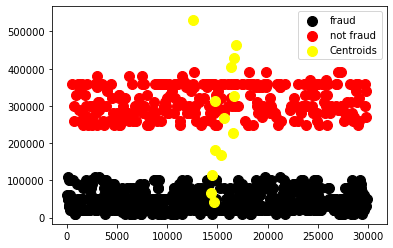

In [36]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'black', label = 'fraud')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'not fraud')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

# NAIVE BAYES CLASSIFIER

## GaussianNB

In [37]:
X=df.drop(["Y"],axis=1)
Y=df["Y"]
from sklearn import metrics 
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [38]:
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 

gnb= GaussianNB()
gnb.fit(X_train,Y_train)

n_outliers = len(Y) 
predictions = gnb.predict(X_test)
n_errors = (predictions != Y_test).sum() 
print("The model used is GaussianNB")

print('GaussianNB Accuracy Score:', gnb.score(X_test,Y_test))

from sklearn.metrics import confusion_matrix
predictions = gnb.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(Y_test,predictions))

prec = precision_score(Y_test, predictions) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(Y_test, predictions) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(Y_test, predictions) 
print("The F1-Score is {}".format(f1)) 

The model used is GaussianNB
GaussianNB Accuracy Score: 0.615
Confusion Matrix
[[277 178]
 [ 53  92]]
The precision is 0.34074074074074073
The recall is 0.6344827586206897
The F1-Score is 0.4433734939759037


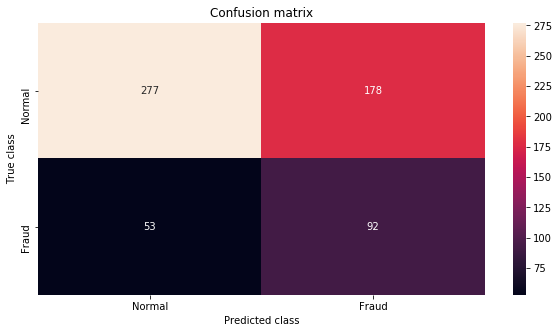

In [39]:
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(Y_test, predictions) 
plt.figure(figsize =(10,5)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()

## BernoulliNB

In [40]:
from sklearn.naive_bayes import BernoulliNB
bnb =BernoulliNB()
bnb.fit(X_train, Y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [41]:
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 


bnb =BernoulliNB()
bnb.fit(X_train, Y_train)

n_outliers = len(Y) 
y_pred_class = bnb.predict(X_test)

n_errors = (predictions != Y_test).sum() 
print("The model used is BernoulliNB")
print("Accuracy:")
print(metrics.accuracy_score(Y_test, y_pred_class))

from sklearn.metrics import confusion_matrix
predictions = bnb.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(Y_test,predictions))

prec = precision_score(Y_test, predictions) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(Y_test, predictions) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(Y_test, predictions) 
print("The F1-Score is {}".format(f1)) 

The model used is BernoulliNB
Accuracy:
0.7583333333333333
Confusion Matrix
[[385  70]
 [ 75  70]]
The precision is 0.5
The recall is 0.4827586206896552
The F1-Score is 0.49122807017543857


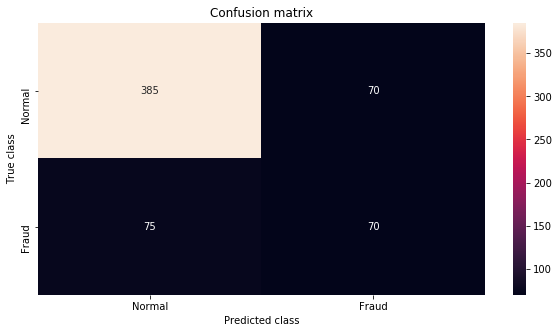

In [42]:
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(Y_test, predictions) 
plt.figure(figsize =(10,5)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()

## ANN

In [43]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.
C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: Future

In [44]:
model = Sequential()
model.add(Dense(12, input_dim=24, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [45]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [46]:
model.fit(X,Y, epochs=50, batch_size=10)


Epoch 1/50
3000/3000 [==============================] - 1s 483us/step - loss: 886.2237 - accuracy: 0.6947
Epoch 2/50
3000/3000 [==============================] - 1s 241us/step - loss: 48.2638 - accuracy: 0.7637
Epoch 3/50
3000/3000 [==============================] - 1s 218us/step - loss: 8.1953 - accuracy: 0.7690
Epoch 4/50
3000/3000 [==============================] - 1s 189us/step - loss: 3.1603 - accuracy: 0.7703
Epoch 5/50
3000/3000 [==============================] - 1s 194us/step - loss: 1.6670 - accuracy: 0.7707
Epoch 6/50
3000/3000 [==============================] - 1s 195us/step - loss: 1.1921 - accuracy: 0.7747
Epoch 7/50
3000/3000 [==============================] - 1s 198us/step - loss: 1.1529 - accuracy: 0.7733
Epoch 8/50
3000/3000 [==============================] - 1s 190us/step - loss: 1.0972 - accuracy: 0.7743
Epoch 9/50
3000/3000 [==============================] - 1s 196us/step - loss: 1.0420 - accuracy: 0.7743
Epoch 10/50
3000/3000 [==============================] - 1s 

In [47]:
_, accuracy = model.evaluate(X,Y)
print('ANN ModelAccuracy: %.2f'%(accuracy*100))

3000/3000 [==============================] - 0s 37us/step
ANN ModelAccuracy: 77.70


[[455   0]
 [144   1]]


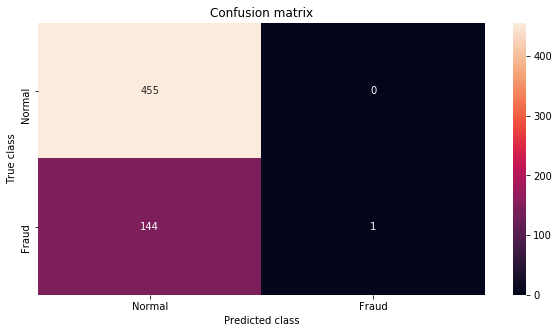

In [48]:
y_pred = model.predict(X_test)
y_pred =(y_pred>0.5)
list(y_pred)

cm = confusion_matrix(Y_test, y_pred)
print(cm)
LABELS = ['Normal', 'Fraud'] 
plt.figure(figsize =(10,5)) 
sns.heatmap(cm, xticklabels = LABELS,yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()

In [49]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

750/750 [==============================] - 0s 16us/step
              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85       558
         1.0       0.00      0.00      0.00       192

    accuracy                           0.74       750
   macro avg       0.37      0.50      0.43       750
weighted avg       0.55      0.74      0.63       750



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## PREDICTING VALUES

In [50]:
logit.predict([[5,12000,1,3,2,45,0,0,1,2,1,0,3333,4500,2300,320,3222,235,344,865,9879,0,977,0]]) # LOGISTIC REGRESSION

array([0.])

In [51]:
rf_clf.predict([[5,12000,1,3,2,45,0,0,1,2,1,0,3333,4500,230,320,3222,235,344,865,9879,465,977,1]]) #RANDOM FOREST CLASSIFIER

array([0.])